Este ejemplo está adaptado del ejemplo 13.5.1 del libro Elementary Mechanich Using Python, Anders Malthe-Sorenssen, Springer.

# Partículas rebotantes unidas por un resorte

En este ejemplo se considerará un sistema de dos partículas, unidas por un resorte que les permite interactuar. Este sistema puede ser el modelo de una molécula diatómica consistente en dos átomos idénticos, o de un cuerpo elástico que pueda vibrar. En este caso, se simplificará el problema asumiendo que las partículas se mueven a lo largo de una línea, en un movimiento unidimensional vertical, donde además le permitiremos rebotar contra el suelo.

En este código se mostrará los principios principales de la distribución de energía a través de un modelo simple.

## Modelo

Se considerará un sistema de dos partículas, etiquetadas $A$ y $B$, cada una de masa $m$, conectadas por un resorte con longitud propia $b$ y constante $k$, y de masa despreciable. Se ubica la partícula $B$ a una altura $h_0$ sobre el suelo: $x_B(t_0) = h_0$ y la partícula $A$ estará ubicada una distancia $b$ sobre la partícula $B$: $x_A(t_0) = x_B(t_0) + b$. Esta elección implica que el resorte está inicialmente en su largo propio, sin estirarse ni comprimirse. El choque de la partícula $B$ con el suelo es elástico, por lo que su velocidad se invierte después de la colisión.

Se describirá el movimiento de cada partícula a partir de las fuerzas que actúan sobre ellas. La partícula $A$ se ve afectada por dos fuerzas: la gravedad $\vec{G}_A = mg (-\hat{\jmath}) $ y la fuerza del resorte $\vec{F}_A$, la cual actúa cuando el resorte se comprime o estira, por lo que depende de la posición de ambas partículas:
$$
\vec{F}_A = -k(x_A - x_B - b)\hat{\jmath}.
$$
De la misma manera, las fuerzas actuando sobre la partícula $B$ son la gravedad $\vec{G}_B = mg (-\hat{\jmath}) $ y la fuerza del resorte $\vec{F}_B$:
$$
\vec{F}_B = - \vec{F}_A = k(x_A - x_B - b)\hat{\jmath}.
$$.
Dada la elección de las posiciones iniciales para $A$ y $B$, la fuerza inicial ejercida por el resorte es nula.

La posición del centro de masas puede calcularse a partir de las posiciones de las partículas $A$ y $B$ como
$$
X_{cm} = \dfrac{1}{M} \sum_i x_i = \dfrac{1}{2m}(mx_A + mx_B) = \dfrac{1}{2} (x_A + x_B).
$$

Aplicando la segunda ley de Newton para cada partícula podemos encontrar su aceleración:
$$
a_A = -\dfrac{k}{m} (x_A - x_B - b )\hat{\jmath} - mg\hat{\jmath},
$$
$$
a_B = \dfrac{k}{m} (x_A - x_B - b )\hat{\jmath}- mg\hat{\jmath},
$$
donde además se debe tener en cuenta una posible colisión entre la partícula $B$ y el suelo. Este choque, que ocurrirá cuando $x_B(t) = 0 $, se modelará como elástico e instantáneo.


In [1]:
import numpy as np                #Se importan los módulos que usaremos 
import matplotlib.pyplot as plt
plt.style.use('bmh')

### Simulación numérica

Para determinar el movimiento de las partículas se usará el método de integración numérica simple que se ha visto en códigos anteriores. Se debe incluir todas las fuerzas que actúan en cada partícula, además de ejecutar el paso de la colisión de la partícula $B$ con el suelo. Pero, ¿cuándo ocurre esta colisión?

Ya que la integración numérica simple que se realizará sólo nos permite determinar la posición de las partículas en intervalos discretos de tiempo $\Delta t$, no se podrá determinar la posición de $B$ cuando esté exactamente en el suelo. En vez de eso, lo que se tendrá es la partícula justo sobre el suelo en un instante $t$ y, luego, la partícula "bajo" el suelo en el instante siguiente $t + \Delta t,$ donde la colisión ocurre (de manera exacta) en algún instante entre los tiempos $t$ y $t + \Delta t$. Se puede tratar de mejorar la estimación de cuándo ocurre la colisión, pero en este caso simplemente se supondrá que el resultado de la colisión es invertir la dirección de la velocidad de la partícula $B$ en el primer paso en que está "bajo" el suelo. Lo más importante de este algoritmo para la colisión es la conservación de la energía. En efecto, debido a que la partícula no se mueve durante la colisión, la energía potencial se conserva, y como sólo cambia la dirección de la velocidad, la energía cinética también se conserva.






In [2]:
#Se definen las condiciones iniciales de integración.

g = 9.8  # Valor de la gravedad, en m/s^2

m = 0.1    # Masa de las partículas, en kg
k = 200.0  # Constante del resorte, en las unidades correspondientes para que la fuerza del resorte esté en N
b = 0.2    # Largo en reposo del resorte, en m
h0 = 1.0   # Altura inicial de la partícula B, en metros 
v0 = 0.0   # Velocidad inicial de ambas partículas, en m/s

tiempo = 10    # Tiempo total de integración, en s
Dt = 0.00001   # Intervalo de tiempo de la integración, en s


In [3]:
xA = h0 + b  # Posición inicial de la partícula A
xB = h0      # Posición inicial de la partícula B

vA = v0  # Velocidades iniciales
vB = v0

t = 0              # Tiempo inicial en segundos

xA_array = [xA]    # Se inicializarán las variables que almacenarán los resultado  en forma de arreglo, para ser graficados.
xB_array = [xB]    # Se inicializarán con el valor inicial de la simulación
vA_array = [vA]
vB_array = [vB] 
t_array  = [t]  



while t < tiempo:   # Control del cálculo. El cálculo se realiza en ciclos, mientras el tiempo no supere el tiempo máximo de integración     
    F  = k*(xA - xB - b)  # Fuerza del resorte
    FA = -F - m*g         # Fuerza que actúa sobre la partícula A
    FB =  F - m*g         # Fuerza que actúa sobre la partícula B

    #Se hace el cálculo, actualizando las variables de velocidad, posición y tiempo.
    vA = vA + FA*Dt/m
    vB = vB + FB*Dt/m

    xA = xA + vA*Dt
    xB = xB + vB*Dt

    t = t + Dt
    
    if xB < 0:     # Condición de colisión
        vB = -vB   # Cambio instantáneo de velocidad 

    

    xA_array.append(xA)   # Guardamos los resultados 
    xB_array.append(xB)   
    vA_array.append(vA)   
    vB_array.append(vB)
    t_array.append(t)

   
# En estas líneas convertiremos los arreglos de las variables de salida en arreglos de numpy,
# para tratar de manera más fácil con ellos

xA_array = np.asarray(xA_array)     
xB_array = np.asarray(xB_array)    
vA_array = np.asarray(vA_array) 
vB_array = np.asarray(vB_array)  
t_array  = np.asarray(t_array)

# Ahora podremos calcular las cantidades asociadas al centro de masas
# Al transformar las cantidades anteriores en arreglos de numpy, se podrán hacer los cálculos de 
# manera más directa
xcm = (xA_array + xB_array )*0.5  # Posición del centro de masas. 
                              
vcm = (vA_array + vB_array )*0.5  # velocidad del centro de masas

Kcm = 0.5*(2*m)*vcm**2          # Energía cinética del centro de masas
Kcmdelta = 0.5*m*(vA_array - vcm)**2+0.5*m*(vB_array - vcm)**2  # Energía cinética de las partículas respecto
                                                                # centro de masas
Ug = xcm*(2*m)*g           # Energía potencial gravitatoria del sistema
Uk = 0.5*k*(xA_array - xB_array - b)**2  # Energía potencial del resorte
E = Kcm + Kcmdelta + Ug + Uk # Energía total del sistema



### Graficando el movimiento

En la siguente celda graficaremos las posiciones de ambas partículas, y la posición del centro de masas, en función del tiempo para un cierto intervalo. 

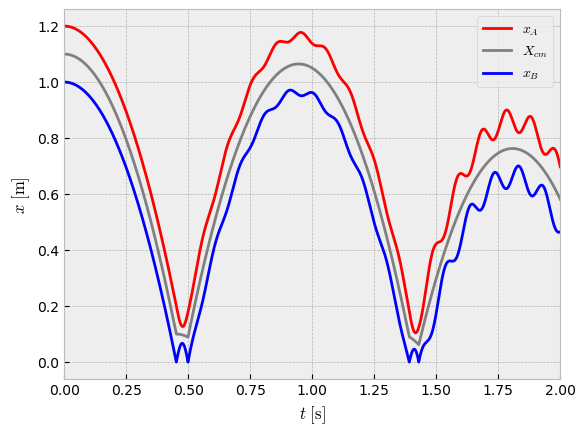

In [4]:
plt.plot(t_array, xA_array, c='red',label='$x_A$') #marker = 'o-'
plt.plot(t_array, xcm, c='grey',label='$X_{cm}}$')
plt.plot(t_array, xB_array, c='blue',label='$x_B$') 

plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$t\ \\rm [s]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$x\ \\rm [m]$') # Etiqueta del eje y
plt.xlim(0,2)
plt.legend() 
#plt.savefig('x_vs_t.png')
plt.show()

Como se puede observar, luego de la primera colisión, las dos partículas se mueven practicamente sin movimeinto relativo. Luego de la segunda colisión, el movimiento relativo se vuelve significativo. 

La línea gris muestra el movimiento del centro de masas. Se sabe que este movimiento sólo depende de las fuerzas externas actuando sobre el sistema. Durante la colisión contra el suelo, el sistema es afectado tanto por la fuerza de gravedad como por la fuerza de contacto con el suelo, pero entre colisiones el sistema está sólo afectado por la gravedad. Así, es de esperar que el centro de masas se comporte como un único objeto de masa $2m$ cayendo bajo el efecto de la gravedad, es decir,
$$
X_{cm}(t) = X_0 + V_0 t - \dfrac{1}{2} gt^2,
$$
donde 
$$
X_{cm}(t) = \dfrac{1}{2}(x_A(t) + x_B(t) )
$$
que corresponde al movimiento parabólico mostrado por la línea gris en el gráfico. Incluso si las partículas oscilan, el centro de masas no muestra ninguna oscilación, sino que sigue un movimiento parabólico suave.



## Distribución de energía

Del gráfico se observa que, luego del segundo rebote, el centro de masas no rebota hasta su altura inicial a pesar de la conservación de la energía total del sistema. Si nuestro sistema fuera una bola rígida, y la colisión con el suelo fuera totalmente elástica (y despreciando la resistencia del aire), es de esperar que la bola rebote hasta su altura inicial, que es donde la altura es máxima y la velocidad es cero, es decir, donde toda la energía mecánica es igual a la energía potencial, la cual depende sólo de la altura. Así, para la bola rígida la altura de cada bote es la misma. Sin embargo, para el sistema estudiado existen, además, grados de libertad internos. En el punto más alto del movimiento, la energía cinética no es cero incluso si la velocidad del centro de masas es cero, debido a que las partículas mantienen su movimiento relativo respecto del centro de masas. De la misma manera, la energía potencial total no es igual a la energía potencial debida al campo gravitacional externo, sino que además se debe considerar la energía potencial del resorte, que depende de la posición relativa de las dos partículas.

### Energía cinética

La energía cinética total es
$$
K = K_{cm} + K_{\Delta cm}, 
$$
donde $K_{cm}$ es la energía cinética del centro de masas,
$$
K_{cm} = \dfrac{1}{2} M_{total}V_{cm}^2 = \dfrac{1}{2} (2m)V_{cm}^2,
$$
es decir, la energía cinética de un cuerpo de masa $2m$, y $K_{\Delta cm}$ es la energía cinética debida al movimiento relativo de las partículas respecto del centro de masas
$$
K_{\Delta cm} = \sum_i \dfrac{1}{2} m_i v^2_{cm,i} = \dfrac{1}{2} m (v_A - V_{cm})^2 + \dfrac{1}{2} m (v_B - V_{cm})^2.
$$




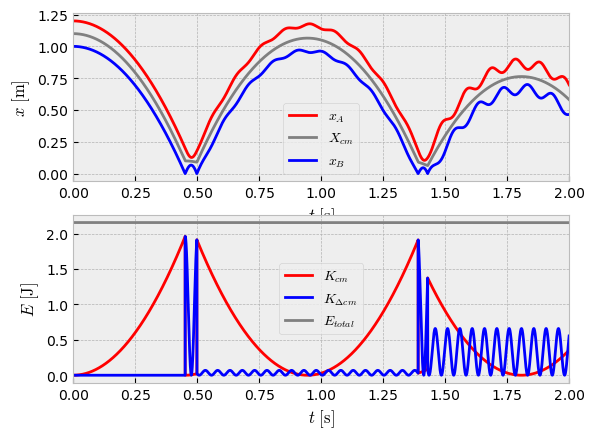

In [5]:
plt.subplot(2,1,1)
plt.plot(t_array, xA_array, c='red',label='$x_A$') #marker = 'o-'
plt.plot(t_array, xcm, c='grey',label='$X_{cm}}$')
plt.plot(t_array, xB_array, c='blue',label='$x_B$') 

plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
#plt.xlabel('$t\ \\rm [s]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$x\ \\rm [m]$') # Etiqueta del eje y
plt.xlim(0,2)
plt.legend() 


plt.subplot(2,1,2)
plt.plot(t_array, Kcm, c='red', label='$K_{cm}$') #marker = 'o-'
plt.plot(t_array, Kcmdelta, c='blue', label='$K_{\Delta cm}$') 
plt.plot(t_array, E, c='grey', label='$E_{total}$') 
#plt.plot(t_array, xcm, c='grey')
plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$t\ \\rm [s]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$E\ \\rm [J]$') # Etiqueta del eje y
plt.xlim(0,2)
plt.legend() 
#plt.savefig('x_vs_t.png')
plt.show()

En la celda anterior se han graficado las energías cinéticas del centro de masas, en rojo, la energía cinética relativa de las partículas, en azul, y la energía total del sistema en gris. Note que antes del primer rebote de la partícula inferior, no hay movimiento relativo, y la energía cinética interna $K_{\Delta cm}$ es cero. Esto, pues ambas partículas se mueven con la misma velocidad. Inmediatamente después de la colisión, la energía cinética interna aumenta de manera discontínua, saltando instantáneamente a un valor alto. ¿Por qué? Esto es debido a que, según nuestro modelo, la velocidad de la partícula inferior se invierte inmediatamente después de la colisión. Esto tiene dos efectos. Primero, el centro de masas ahora tiene velocidad cero. Y segundo, la magnitud de las velocidades de ambas partículas es la misma, pero con sentido opuesto. El resultado es que cada partícula repentinamente tiene una velocidad relativa al centro de masas igual a la velocidad que tenían antes de la colisión. Como resultado, la energía cinética interna "salta" a un valor más alto.

Otra observación interesante es la oscilación en la energía cinética interna debida a la oscilación de las partícular alrededor del centro de masas, lo cual se puede ver en las oscilaciones que muestra la línea azul posterior al segundo rebote. 




### Energía potencial

Por su parte, la energía potencial total del sistema es la suma de todas las energías potenciales, que corresponde a la energía potencial gravitatoria y la energía potencial elástica del resorte:
$$
U_{TOT} = \sum_i U_i^{ext} + \sum_{i<j} U_i^{int} = \sum_i m_i g x_i + \dfrac{1}{2} k(x_A - x_B - b)^2.
$$
Si desarrollamos en término de la energía potencial externa queda
$$
\sum_i m_i g x_i = m g x_A + m g x_B = m g (x_A + x_B), 
$$
y dado que $(x_A + x_B) = 2X_{cm} $, este término queda
$$
\sum_i U_i^{ext} = 2mgX_{cm},
$$
es decir, la energía potencial de un cuerpo de masa $2m$.

Las dos componentes de la energía potencial se han graficado en la siguiente celda.



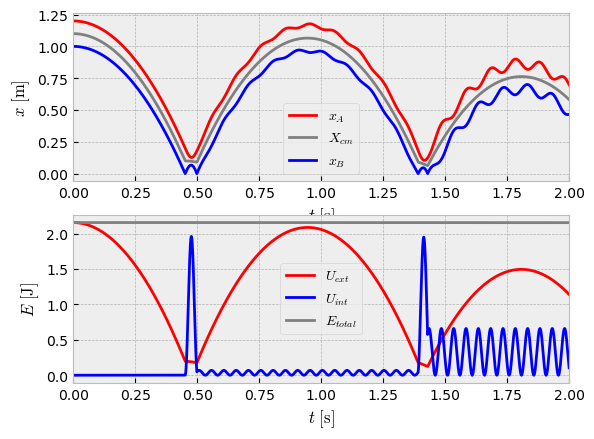

In [6]:
plt.subplot(2,1,1)
plt.plot(t_array, xA_array, c='red',label='$x_A$') #marker = 'o-'
plt.plot(t_array, xcm, c='grey',label='$X_{cm}}$')
plt.plot(t_array, xB_array, c='blue',label='$x_B$') 

plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$t\ \\rm [s]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$x\ \\rm [m]$') # Etiqueta del eje y
plt.xlim(0,2)
plt.legend() 


plt.subplot(2,1,2)
plt.plot(t_array, Ug, c='red', label='$U_{ext}$') #marker = 'o-'
plt.plot(t_array, Uk, c='blue', label='$U_{int}$') 
plt.plot(t_array, E, c='grey', label='$E_{total}$') 
#plt.plot(t_array, xcm, c='grey')
plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$t\ \\rm [s]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$E\ \\rm [J]$') # Etiqueta del eje y
plt.xlim(0,2)
plt.legend() 
#plt.savefig('x_vs_t.png')
plt.show()

En la celda anterior se han graficado la energía potencial del centro de masas, en rojo, la energía potencial del resorte, en azul, y la energía total en gris. Se puede observar que la energía potencial del centro de masas sólo sigue el movimiento del centro de masas, mientras que la energía potencial interna, al estar relacionada con la energía almacenada en el resorte al comprimirse y estirarse, sigue el movimiento de las partículas relativo al centro de masas. 

Un análisis más detallado de las dos figuras anteriores muestra que las energías internas cinética y potencial oscilan con fases opuestas, de tal manera que cuando la energía cinética interna es máxima, la energía potencial interna es mínima, y viceversa. Esto se visualizará en la siguente celda.



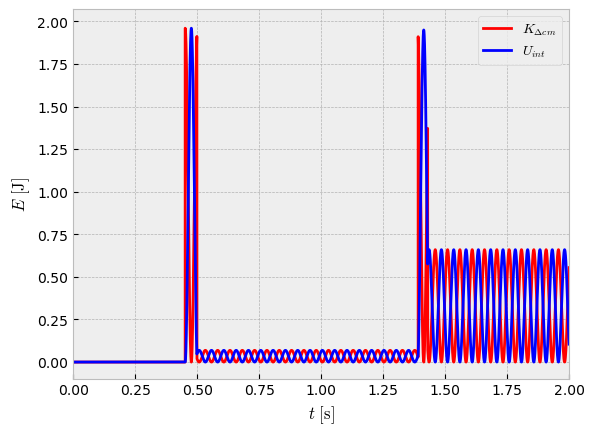

In [7]:
plt.plot(t_array, Kcmdelta, c='red', label='$K_{\Delta cm}$') #marker = 'o-'
plt.plot(t_array, Uk, c='blue', label='$U_{int}$') 
#plt.plot(t_array, xcm, c='grey')
plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$t\ \\rm [s]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$E\ \\rm [J]$') # Etiqueta del eje y
plt.xlim(0,2)
plt.legend() 
#plt.savefig('x_vs_t.png')
plt.show()

## Discusión

De este ejemplo se puede ver que la energía mecánica se conserva sólo si se consideran todas las formas que pueden tomar. La energía mecánica correspondiente a la energía cinética y potencial del centro de masas en general no se conserva. Se debe tomar en cuenta, además, todos los posibles modos de movimiento internos y sus asociadas energías potenciales. Sin embargo, si se simplifica el sistema de tal manera que los modos vibracionales no estén presentes, como en un cuerpo rígido que no se deforma, ¿basta con usar las energías cinética y potencial del centro de masas? La respuesta es no. Por ejemplo, un sistema real en dos o tres dimensiones puede rotar sin deformarse. En casos como este, se debe incluir el efecto de las rotaciones.



Una animación de un problema similar puede ser encontrada aquí: https://miro.medium.com/max/786/1*hq9UchRztW646g-DHbcAYg.gif . Esta animación pertenece a este artículo: https://rjallain.medium.com/how-can-you-model-a-realistic-bouncing-ball-using-springs-bdc0480090d . 